In [2105]:
import glob
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import gurobipy as gp
from sklearn.preprocessing import StandardScaler

In [2106]:
path='/home/mateus/MEGA/Projetos/AprendendoLivroMaosaObra-SkleanKerasTensorFLow/Parte 1 - Conceitos basicos de Aprendizado de Maquina/Capitulo 2/datasets/housing/housing.csv'

In [2107]:

class RegressaoLinear:  
    def Linear(self,X,Y):
        result = None
        X = np.c_[np.ones((np.size(X),1)),X]
        parte1 = np.linalg.inv((X.T).dot(X))
        parte2 = parte1.dot(X.T)
        result = parte2.dot(Y)

        return result
    
    def gradiente(self,X:np.array,Y:np.array,max_iter=1_000,eta=0.1,theta=np.random.randn(2,1)):
        m = np.size(X)
        X = np.c_[np.ones((m,1)),X]
        
        for iter in range(max_iter):
            grads = ( X.T.dot(X.dot(theta)-Y) )
            
            if np.any(np.isnan(grads)):break
            if np.any(np.isinf(grads)):break
            if np.any(np.isneginf(grads)):break
            grads =  2/m *grads
            theta = theta - eta*(grads)
            theta = np.around(theta,decimals=4)


    
        return theta

In [2108]:
data = pd.read_csv(path)
X = data.drop(columns=['median_house_value'],axis=0)
X = data.dropna()

In [2109]:
len = 40
X = data['households'].values[0:len].reshape(-1,1)
Y = data['total_bedrooms'].values[0:len]

In [2110]:
x = RegressaoLinear().Linear(X,Y)

In [2111]:
def f (y):return x[0] + x[1]*y   

Text(0.5, 1.0, '[24.95687141  0.98800311]')

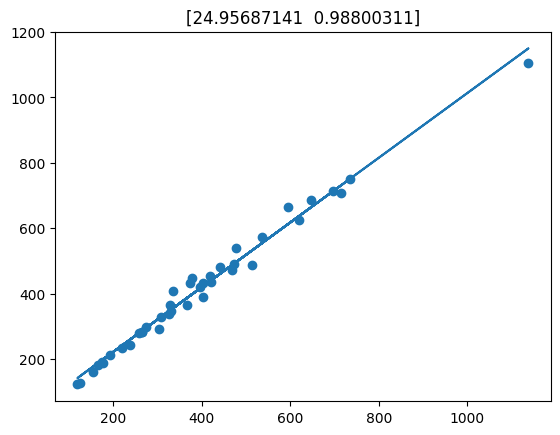

In [2112]:
plt.scatter(X,Y)

plt.plot(X,f(X.reshape(1,-1)[0]))
plt.title(x)

&nbsp;

## Gradiente descendente em lote

In [2113]:
X = StandardScaler().fit_transform(X)

x = RegressaoLinear().gradiente(X,Y,max_iter=10000,eta=0.2,theta=[2,1])

In [2114]:
def f (y):return x[0] + x[1]*y   

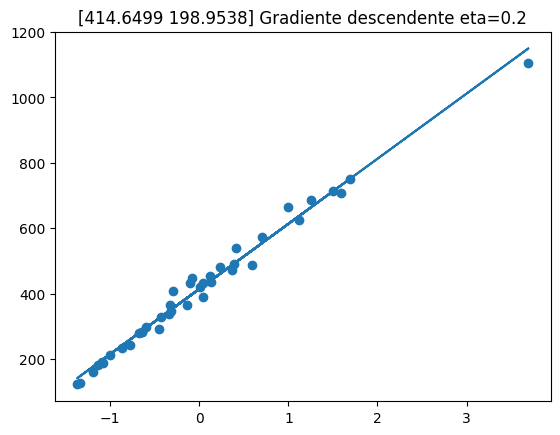

In [2115]:
plt.scatter(X,Y)
plt.plot(X,f(X.reshape(1,-1)[0]))
plt.title(str(x)+' Gradiente descendente eta='+str(0.2))
plt.show()

&nbsp;

## Gradiente descendente Estocástico

In [2116]:
def CronogramaDeAprendizado(t0,t1,t):
    return ( t0 / (t+t1) )

def GradienteEscatico(X,Y,n_epochs=50,t0=5,t1=50,theta=np.array([10,3])):
    m = np.size(X)
    X = np.c_[np.ones((m,1)),X]

    for epoch in range(n_epochs):

        for i in range(m):
            randomIndex = np.random.randint(0,m)
            xi = X[randomIndex:randomIndex+1]
            
            yi = Y[randomIndex:randomIndex+1]
         
            gradients =  2* xi.T.dot(xi.dot(theta)-yi)

            if np.any( np.isnan(gradients)    ,where=True):break
            if np.any( np.isinf(gradients)    ,where=True):break
            if np.any( np.isneginf(gradients) ,where=True):break

            eta   = CronogramaDeAprendizado(t0,t1,epoch*m+i)
            theta = theta - eta * gradients

            #theta = np.around(theta,10)
            if np.any( np.isnan(theta)    ,where=True):break
            if np.any( np.isinf(theta)    ,where=True):break

            if np.any( np.isneginf(theta) ,where=True):break
        print(f'Epochs {epoch} & eta = {eta} & theta = {theta}')
    return theta



In [2117]:
intercep , coef = GradienteEscatico(X,Y,n_epochs=30,t0=1,t1=90,theta=np.array([2,2])) 
intercep,coef

Epochs 0 & eta = 0.007751937984496124 & theta = [207.25332177  55.44431933]
Epochs 1 & eta = 0.005917159763313609 & theta = [300.55048904 119.41307978]
Epochs 2 & eta = 0.004784688995215311 & theta = [342.9344892  150.53200957]
Epochs 3 & eta = 0.004016064257028112 & theta = [359.64042745 156.31111053]
Epochs 4 & eta = 0.0034602076124567475 & theta = [373.32278712 169.1343826 ]
Epochs 5 & eta = 0.00303951367781155 & theta = [384.46651783 178.77992246]
Epochs 6 & eta = 0.0027100271002710027 & theta = [390.41830308 183.12754158]
Epochs 7 & eta = 0.0024449877750611247 & theta = [395.39886651 185.2160657 ]
Epochs 8 & eta = 0.0022271714922048997 & theta = [398.42808041 186.87696603]
Epochs 9 & eta = 0.002044989775051125 & theta = [400.53307718 188.49953542]
Epochs 10 & eta = 0.001890359168241966 & theta = [402.11357036 190.25327375]
Epochs 11 & eta = 0.0017574692442882249 & theta = [403.48394369 191.17235301]
Epochs 12 & eta = 0.0016420361247947454 & theta = [404.9069543  192.50939043]
Epoc

(411.3483519867807, 197.9960679734235)

In [2118]:
def f (y):return intercep + coef*y  

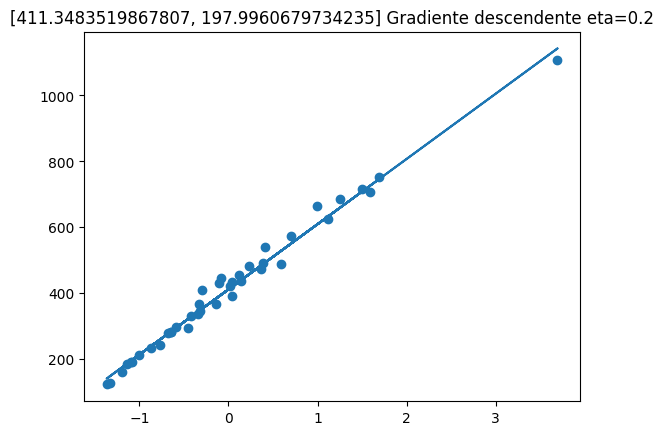

In [2119]:
plt.scatter(X,Y)
plt.plot(X,f(X.reshape(1,-1)[0]))
plt.title(str([intercep,coef])+' Gradiente descendente eta='+str(0.2))
plt.show()

&nbsp;

### Regressão Polinomial

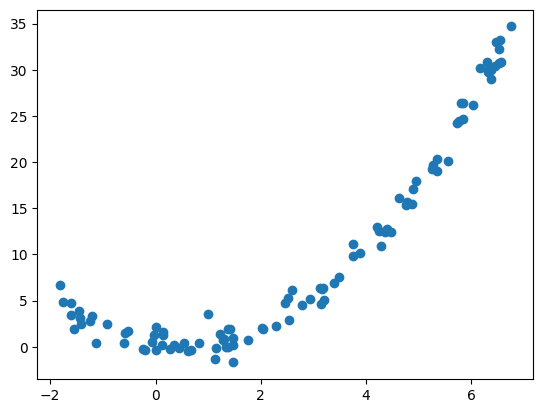

In [2185]:
m = 100
X = 9 * np.random.rand(m,1) - 2
Y = 0.9 * X **2 - X + np.random.randn(m,1) 
plt.scatter(X,Y)
plt.show()

In [2186]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

In [2197]:
Xpoly = PolynomialFeatures(degree=4,include_bias=False).fit_transform(X)

In [2198]:
reg  = LinearRegression()
reg.fit(Xpoly,Y) 

LinearRegression()

In [2199]:
def F(x):
    fx = 0
    intercep = reg.intercept_[0]
    coef     = reg.coef_.tolist()[0]

    for i, coeficiente in enumerate(coef, start=1):
        fx += (coeficiente * x )** i
        
    return fx + intercep

In [2200]:
fx = sorted(X.T.tolist()[0])

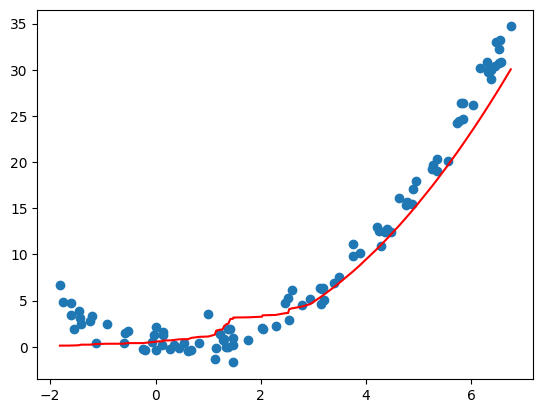

In [2201]:
plt.scatter(X,Y)
plt.plot(sorted(X.reshape(1,-1)[0]),sorted(F(X.reshape(1,-1)[0])),c='red')